# Machine Learning's "Hello World"!

This is the assignment **#2** related to **Machine Learning** section of the **Artificial Intelligence** course at **Shahid Beheshti University**. ([Course repository link](https://github.com/SBU-CE/Artificial-Intelligence)).

In this notebook, we explore the basic and traditional machine learning algorithms and see how to implement predictive models powered by [Sickit-Learn](https://scikit-learn.org/stable/) library.

 
 **Before you start:** Please read the ***Submission*** section at the bottom of the notebook carefully.

In [1]:
# lets import the essential packages as usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Medical Insurance Cost Prediction

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost:

- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight using the ratio of height to weight, ideally 18.5 to 24.9
- **smoker**: Smoking
- **children**: Number of children covered by health insurance / Number of dependents

In [2]:
df = pd.read_csv('datasets/insurance.csv')
print("Shape of the dataset: {}".format(df.shape))
df.head(5)

Shape of the dataset: (1338, 6)


,age,sex,bmi,children,smoker,charges
0,45,female,27.83,2,no,8515.7587
1,24,male,32.70,0,yes,34472.8410
2,34,female,29.26,3,no,6184.2994
3,64,male,34.50,0,no,13822.8030
4,27,female,24.10,0,no,2974.1260


There is a library named `pandas_profiling` in Python include a method named as `ProfileReport()` which generate a basic report on the input DataFrame. The report consist of the following:

- DataFrame overview,
- Each attribute on which DataFrame is defined,
- Correlations between attributes (Pearson Correlation and Spearman Correlation), and
- A sample of DataFrame.

By running the cell below, a HTML file will be created next to the notebook in the project directory.

In [3]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [4]:
# import pandas_profiling library
import pandas_profiling as pp

# forming ProfileReport and save
# as a HTML file
profile = pp.ProfileReport(df)
profile.to_file("insurance_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.1 Linear Regression

**Linear Regression** is a machine learning algorithm based on **supervised learning**. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
<img src="images/linear-regression.png" width=400 height=400 />

In this problem, we want to create a linear regression model for the existing dataest. For simplicity, we only consider one of the features of the data `bmi` and the target `charges`. Also we are just interested in the people who smokes. So:

Text(0, 0.5, 'charges')

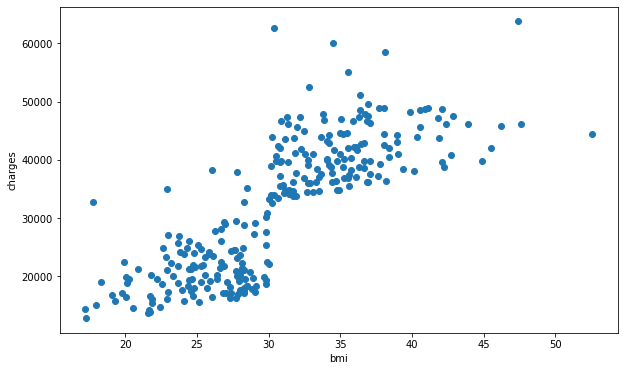

In [5]:
%matplotlib inline
X = df[df['smoker'] =='yes']['bmi'].values  # X now is a numpy array
target = df[df['smoker'] =='yes']['charges'].values  # also target is a numpy array

# plot the points
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X, y = target)
plt.xlabel("bmi")
plt.ylabel("charges")

## Q1. Implement `SimpleLinearRegression` class. (20 points)

Fill the blank lines with the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics


class SimpleLinearRegression():
    def __init__(self):
        self.intercept = 0.0
        self.coeff = 0.0
        self.st_scaler = StandardScaler()
        self.min_max_scaler = MinMaxScaler()
    
    def train(self, X_train, y_train):
        # TODO: Thin function takes X_train: numpy.ndarray and y : numpy.ndarray
        # and fit a linear line to the points with the least loss
        # Use sklearn.linear_model.LinearRegression for this purpose
        # At last this function must set the intercept and coefficient of the predicted line
        
        intercept = 0.0
        coeff = 0.0
        ############# Your code here ############
        self.reg = LinearRegression()
        self.reg.fit(X_train, y_train)
        coeff = self.reg.coef_
        intercept = self.reg.intercept_
        #########################################
        
        self.intercept = intercept
        self.coeff = coeff
        
        return coeff, intercept
    
    def compute_loss(self, y_pred, y_true, loss_fn = 'MSE'):
        # TODO: Implement this function that takes y_pred and y_true
        # as a 1-dimensional numpy array (n_samples,) and returns
        # the loss using sklearn.metrics functions
         
        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']
        
        loss = None
        if loss_fn == 'MSE':
            ############# Your code here ############
            loss = metrics.mean_squared_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'MAE':
            ############# Your code here ############
            loss = metrics.mean_absolute_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'R2_Score':
            ############# Your code here ############
            loss = metrics.r2_score(y_true, y_pred)
            #########################################
        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return loss
        
    def normalize(self, X, normalization='Standardization', is_test=False):
        # TODO: Implement this function that takes X : numpy.ndarray
        # as the input feature array and normalize it
        # You can use sklearn.preprocessing normalizations functions too.
        # NOTE: For test set, you must use the mean and std of train set (standardization)
        # of the train set. (since test set has not seen so far)
        possible_normalization = ['Standardization', 'MinMaxScaling']
        
        nomalaized_feat = None
        if normalization == 'Standardization':
            ############# Your code here ############
            if not is_test:
                nomalaized_feat = self.st_scaler.fit_transform(X)
            else:
                nomalaized_feat = self.st_scaler.transform(X)
            #########################################
        elif normalization == 'MinMaxScaling':
            ############# Your code here ############
            if not is_test:
                nomalaized_feat = self.min_max_scaler.fit_transform(X)
            else:
                nomalaized_feat = self.min_max_scaler.transform(X)
            #########################################
        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return nomalaized_feat
    
    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):   
        # TODO: Implement this function that takes X : numpy.ndarray and y : numpy.ndarray
        # and use sklearn.model_selection.train_test_split to split your data into test and train sets
        X_train, y_train, X_test, y_test = None, None, None, None
        ############# Your code here ############
        X_train, X_test, y_train, y_test = train_test_split( 
            X, y, test_size=test_size, random_state=random_state)
        #########################################
        
        return X_train, y_train, X_test, y_test

## Q2. What are the coefficient and intercept of the trained linear model? (5 points)

After completing the functions above, use them to report the final coefficient and intercept of the predicted model.

**Note**: When implementing the `SimpleLinearRegression` class, notice that before training your model, normalize your input features for better convergence by completeing `normalize()` function. If you forget it, it may hurts your model consequently!

In [7]:
slr = SimpleLinearRegression()
############# Your code here ############
X_train, y_train, X_test, y_test = slr.prepare_dataset(X, target)
X_train, X_test, y_train, y_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1), \
                            y_train.reshape(-1, 1), y_test.reshape(-1, 1)
norm_form = 'Standardization'
X_train = slr.normalize(X_train, norm_form)
X_test = slr.normalize(X_test, norm_form, is_test=True)
slr.train(X_train, y_train)
print("intercept: ", slr.intercept)
print("coeff: ", slr.coeff)
#########################################

intercept:  [32001.67090192]
coeff:  [[9339.09746889]]


## Q3. Plot the prediceted line and the data points. (5 points)

- Use `plt.scatter` to indicate the data points (Blue points for Train set and Red points for Test set).
- Plot the predicted line using the coefficient and intercept calculated in the previous question. (`plt.plot`)

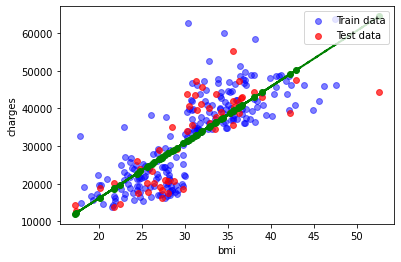

In [8]:
############# Your code here ############
%matplotlib inline
if norm_form == 'MinMaxScaling':
  s_x_train = slr.min_max_scaler.inverse_transform(X_train)
  s_X_test = slr.min_max_scaler.inverse_transform(X_test)
else:
  s_x_train = slr.st_scaler.inverse_transform(X_train)
  s_X_test = slr.st_scaler.inverse_transform(X_test)
plt.scatter(s_x_train, y_train, c = 'blue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(s_X_test, y_test, c = 'red', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend(loc = 'upper right')
plt.plot(s_X_test, X_test * slr.coeff + slr.intercept, color='green', marker='.', linestyle='dashed',
         linewidth=2, markersize=12)
plt.show()
#########################################

## Q4. Compute loss. (5 points)

First you must search about the following loss functions and compare them. (By showing their benefits to each other).

- **MSE**: Mean Squared Error
- **MAE**: Mean Absolute Error
- **R2-score**

Then create a DataFrame similar to the table shown below:

| loss_function | train_set | test_set | 
| --- | --- | --- |
| MSE | ... | ... |
| MAE | ... | ... |
| R2-score | ... | ... |


**Answer**

**MSE**

In statistics, the mean squared error (MSE)or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

<img src="images/mse-def.png" width=250 height=250 />

MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate. The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value that decreases as the error approaches zero.The MSE is the second moment of the error and thus incorporates both the estimator's variance (how widely spread the estimates are from one data sample to another) and its bias (how far off the average estimated value is from the actual value). For an unbiased estimator, the MSE is the variance of the estimator. Like the variance, MSE has the same units of measurement as the square of the quantity being estimated.

**MAE**

In statistics, mean absolute error (MAE) measures errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one measurement technique versus an alternative technique of measurement. MAE is calculated as:

<img src="images/mae-def.png" width=250 height=250 />

Note that alternative formulations may include relative frequencies as weight factors. The mean absolute error uses the same scale as the data being measured. This is known as a scale-dependent accuracy measure and, therefore, cannot be used to compare series using different scales. The mean absolute error is a common measure of forecast error in time series analysis, sometimes confused with the more standard definition of mean absolute deviation. The same confusion exists more generally.

**R2-score**

In statistics, the coefficient of determination denoted R2 or r2 and pronounced "R squared" is the proportion of the variation in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose primary purpose is to predict future outcomes or test hypotheses based on other related information. It measures how well-observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

There are several definitions of R2 that are only sometimes equivalent. One class of such cases includes simple linear regression where r2 is used instead of R2. When only an intercept is included, then r2 is simply the square of the sample correlation coefficient (i.e., r) between the observed outcomes and the observed predictor values. If additional regressors are included, R2 is the square of the multiple correlation coefficient. In both such cases, the coefficient of determination ranges typically from 0 to 1.

There are cases where the computational definition of R2 can yield negative values, depending on the definition used. This can arise when the predictions that are being compared to the corresponding outcomes have not been derived from a model-fitting procedure using those data. Even if a model-fitting procedure has been used, R2 may still be negative, for example, when linear regression is conducted without including an intercept, or when a non-linear function is used to fit the data. In cases where negative values arise, the mean of the data provides a better fit to the outcomes than the fitted function values, according to this criterion.

The coefficient of determination can be more (intuitively) informative than MAE, MAPE, MSE, and RMSE in regression analysis evaluation, as the former can be expressed as a percentage, whereas the latter measures have arbitrary ranges. It also proved more robust for poor fits than SMAPE on the article's test datasets.

When evaluating the goodness-of-fit of simulated (Ypred) vs measured (Yobs) values, it is not appropriate to base this on the R2 of the linear regression (i.e., Yobs= m·Ypred + b). The R2 quantifies the degree of any linear correlation between Yobs and Ypred, while for the goodness-of-fit evaluation, only one specific linear correlation should be considered: Yobs = 1·Ypred + 0 (i.e., the 1:1 line).


In [9]:
############# Your code here ############
pred_y = slr.reg.predict(X_train)
pred_y_test = slr.reg.predict(X_test)
train_set = [slr.compute_loss(pred_y, y_train, 'MSE'),
             slr.compute_loss(pred_y, y_train, 'MAE'),
             slr.compute_loss(pred_y, y_train, 'R2_Score')]
test_set = [slr.compute_loss(pred_y_test, y_test, 'MSE'),
             slr.compute_loss(pred_y_test, y_test, 'MAE'),
             slr.compute_loss(pred_y_test, y_test, 'R2_Score')]
data = {'loss_function': ['MSE', 'MAE', 'R2-score'], 'train_set':train_set, 'test_set':test_set}
df_data = pd.DataFrame(data)
            
#########################################

In [10]:
df_data

,loss_function,train_set,test_set
0,MSE,4.578882e+07,4.884309e+07
1,MAE,5.146869e+03,5.379705e+03
2,R2-score,6.557427e-01,6.286655e-01


## 1.2 Underfitting & Overfitting Issues

A model is said to be a good machine learning model if it generalizes any new input data from the problem domain in a proper way. This helps us to make predictions in the future data, that the data model has never seen. Now, suppose we want to check how well our machine learning model learns and generalizes to the new data (Test set). For that, we have overfitting and underfitting, which are majorly responsible for the poor performances of the machine learning algorithms.

- **Underfitting:** A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm **does not fit the data well enough**. It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection. 

    Techniques to reduce underfitting: 

    1. Increase model complexity
    2. Increase the number of features, performing feature engineering
    3. Remove noise from the data.
    4. Increase the number of epochs or increase the duration of training to get better results.
    
    
- **Overfitting:** A statistical model is said to be overfitted when we train it with a lot of data (just like fitting ourselves in oversized pants!). When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. 

    Techniques to reduce overfitting: 

    1. Increase training data.
    2. Reduce model complexity.
    3. Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
    4. Ridge Regularization and Lasso Regularization
    
    In the image below you can see linear regression and polynomial regression models. In the linear model, the model has underfitted and thus it cannot be generalized on all the data point properly (Underfitting). So we can add polynomial features as well to increase the complexity of the model. Therefore, in the middle figure you can see better fittnes of the model on the data points by adding $\{x^2, x^3, x^4\}$ to our hypothesis space.
Although in the right side figure you see less loss than others, but the model is overfitted. It cannot be generalized on the test set (unseen data). 
    
<img src="images/underfitting_overfitting.png" width=700 height=700 />


**Note:** The image above is not related to the given `insurance.csv` dataset.

## Q5. Implement `PolynomialRegression` class. (15 points)

Fill the blank lines with using the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler


class PolynomialRegression():
    def __init__(self, degree=3):
        self.degree = degree
        self.st_scaler = StandardScaler()
        self.min_max_scaler = MinMaxScaler()
    
    def train(self, X_train, y_train):
        # TODO: Thin function takes X_train: numpy.ndarray and y : numpy.ndarray
        # and fit a linear line to the points with the least loss
        # Use sklearn.linear_model.LinearRegression for this purpose
        # At last this function must set the intercept and coefficient of the predicted line
        
        intercept = None
        coeff = None
        ############# Your code here ############
        self.reg = LinearRegression()
        self.reg.fit(X_train, y_train)
        coeff = self.reg.coef_
        intercept = self.reg.intercept_
        #########################################
        
        return coeff, intercept
    
    def compute_loss(self, y_pred, y_true, loss_fn = 'MSE'):
        # TODO: Implement this function that takes y_pred and y_true
        # as a 1-dimensional numpy array (n_samples,) and returns
        # the loss using sklearn.metrics functions
         
        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']
        
        loss = None
        if loss_fn == 'MSE':
            ############# Your code here ############
            loss = metrics.mean_squared_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'MAE':
            ############# Your code here ############
            loss = metrics.mean_absolute_error(y_true, y_pred)
            #########################################
        elif loss_fn == 'R2_Score':
            ############# Your code here ############
            loss = metrics.r2_score(y_true, y_pred)
            #########################################
        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return loss
        
    def normalize(self, X, normalization='Standardization', is_test=False):
        # TODO: Implement this function that takes X : numpy.ndarray
        # as the input feature array and normalize it
        # You can use sklearn.preprocessing normalizations functions too.
        # NOTE: For test set, you must use the mean and std of train set (standardization)
        # of the train set. (since test set has not seen so far)
        possible_normalization = ['Standardization', 'MinMaxScaling']
        
        nomalaized_feat = None
        if normalization == 'Standardization':
            ############# Your code here ############
            if not is_test:
                nomalaized_feat = self.st_scaler.fit_transform(X)
            else:
                nomalaized_feat = self.st_scaler.transform(X)
            #########################################
        elif normalization == 'MinMaxScaling':
            ############# Your code here ############
            if not is_test:
                nomalaized_feat = self.min_max_scaler.fit_transform(X)
            else:
                nomalaized_feat = self.min_max_scaler.transform(X)
            #########################################
        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)
        
        return nomalaized_feat
    
    def generate_polynomial_features(self, X, degree):
        # TODO: Implement this function that takes degree: int and X: numpy.ndarray
        # to return polnomial features of those input features.
        # Use sklearn.preprocessing.PolynomialFeatures. Read its documentation for more info.
        X_pol = None
        ############# Your code here ############
        poly = PolynomialFeatures(degree)
        X_pol = poly.fit_transform(X)
        #########################################
        
        return X_pol
        

    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):   
        # TODO: Implement this function that takes X : numpy.ndarray and y : numpy.ndarray
        # and use sklearn.model_selection.train_test_split to split your data into test and train sets
        X_train, y_train, X_test, y_test = None, None, None, None
        ############# Your code here ############
        X_train, X_test, y_train, y_test = train_test_split( 
            X, y, test_size=test_size, random_state=random_state)
        #########################################
        
        return X_train, y_train, X_test, y_test

## Q6. Find the best polynomial degree. (10 points)

The best polynomial degree is the one with the least loss for test set data points. So use the implemented `PolynomialRegression`above multiple times to find the best one. 

In [12]:
least_loss = float('inf')
best_degree = 1
for degree in range(1, 21):   
    pr = PolynomialRegression(degree=degree)
    ############# Your code here ############
    pr = PolynomialRegression(degree=degree)
    a_poly = pr.generate_polynomial_features(X_train, degree=degree)
    a_poly = pr.normalize(a_poly,normalization=norm_form)
    coeff, intercept = pr.train(a_poly, y_train)
    b_poly = pr.generate_polynomial_features(X_test, degree=degree)
    b_poly = pr.normalize(b_poly,normalization=norm_form)
    loss = pr.compute_loss(pr.reg.predict(b_poly), y_test)
    if(loss < least_loss):
      least_loss = loss
      best_degree = degree
    #########################################

In [13]:
best_degree

9

## Q7. Plot some experimental results (5 points)

Use `plt.subplot` to plot the predicted polynomial model **for degrees, 1, 4 and 20**.

So note that you must present 1 figure with 3 plots.

Also consider these:
- Set the title of each plot to ***Polynomial Fit degree i***
- Print loss of each model on both train and test set.

Polynomial Fit degree 1 -> train loss= 45788820.509763926, test loss= 48859853.55209285
Polynomial Fit degree 4 -> train loss= 37374998.901334256, test loss= 56730529.56870753
Polynomial Fit degree 20 -> train loss= 28128892.478002783, test loss= 5.649475839528085e+21


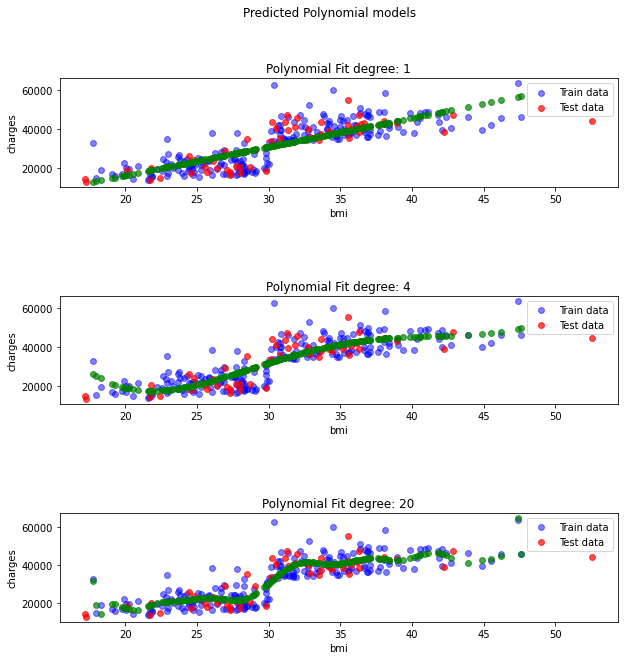

In [14]:
############# Your code here ############
fig, axs = plt.subplots(3, figsize=(10, 10))
fig.suptitle('Predicted Polynomial models')

list_deg = [1,4,20]
for i in range(len(list_deg)):
    degree = list_deg[i]
    pr = PolynomialRegression(degree=degree)
    X_train, y_train, X_test, y_test = pr.prepare_dataset(X, target)
    X_train, X_test, y_train, y_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1), \
                            y_train.reshape(-1, 1), y_test.reshape(-1, 1)
    a_poly = pr.generate_polynomial_features(X_train, degree=degree)
    a_poly = pr.normalize(a_poly,normalization=norm_form)
    coeff, intercept = pr.train(a_poly, y_train)

    axs[i].scatter(X_train, y_train,
              c = 'blue', marker = 'o', s = 35, alpha = 0.5,
              label = 'Train data')
    axs[i].scatter(X_test, y_test,
              c = 'red', marker = 'o', s = 35, alpha = 0.7,
              label = 'Test data')
    axs[i].set_title('Polynomial Fit degree: ' + str(degree))
    axs[i].set_xlabel("bmi")
    axs[i].set_ylabel("charges")
    axs[i].legend(loc = 'upper right')
    axs[i].scatter(X_train, pr.reg.predict(a_poly), 
            c = 'green', marker = 'o', s = 35, alpha = 0.7)
    b_poly = pr.generate_polynomial_features(X_test, degree=degree)
    b_poly = pr.normalize(b_poly,normalization=norm_form)
    print(f"Polynomial Fit degree {degree} -> train loss= {pr.compute_loss(pr.reg.predict(a_poly), y_train)}, test loss= {pr.compute_loss(pr.reg.predict(b_poly), y_test)}")
fig.subplots_adjust(hspace=1)
#########################################

# 2. Mall Customer Clustering

How to customize our services for an existing mall customers? One way to do this is to cluster customers based on some information(features) we have from them. Customers with similar features must be corresponded to the samed clusters(groups).

There is a dataset `datasets/mall_customers.csv` which can be found in the project directory. It has the following features per example:

- **sex**: customer gender, female, male
- **age**: customer age
- **annual_income**: estimated annual income of each customer (k\$)
- **spending_score**: An interger value between 0 and 100 which indicates the score of the customer for his/her ability for purchasing products.

In this problem we are going to cluster the customers based on their `annual_income` and `spending_score` features.

In [15]:
df = pd.read_csv('datasets/mall_customers.csv')
print("Shape of the dataset: {}".format(df.shape))
df.head(5)

Shape of the dataset: (200, 4)


,sex,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Text(0, 0.5, 'spending_score')

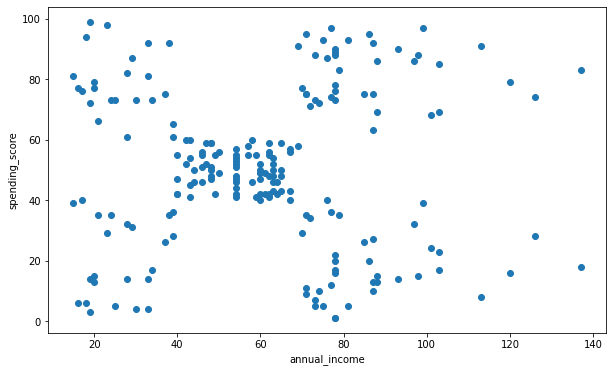

In [16]:
X = df[['annual_income', 'spending_score']]

# plot the points
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X['annual_income'], X['spending_score'])
plt.xlabel("annual_income")
plt.ylabel("spending_score")

## 2.1 K-means clustering algorithm

We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the kMeans algorithm; an **unsupervised** learning algorithm. 

The algorithm will categorize the items into k groups of similarity. To calculate that similarity, we will use the euclidean distance as measurement.

The algorithm works as follows:

1. First, we initialize $k$ points, called means(centroids), randomly.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

The *points* mentioned above are called means because they hold the mean values of the items categorized in them. To initialize these means, we have a lot of options. An intuitive method is to initialize the means at random items in the data set.

The above algorithm in pseudocode: 

```
Initialize k means with random values

For a given number of iterations:
    Iterate through items:
        Find the mean closest to the item
        Assign item to mean
        Update mean
```

Hopefully in this assignment we will not implement this algorithm from scratch. Sickit-learn library has provided it for us and we will use it readily.

<img src="images/kmeans.png" width=700 height=700 />

## Q8. Train a Kmeans model (15 points)

You must use `sklearn.cluster.KMeans` functionalities to implement a kmeans. Follow the steps below:

1. Initiallize the kmeans model with $k=5$
2. Fit the model on the training set.
3. Assign the learnt clusters to testing set points
4. Compute WCSS criteria for the trained model(kmeans.inertia_)


Note: You may need to read the documentation of the scikit learn library for kmeans entirely.

In [17]:
from sklearn.cluster import KMeans

# split data to train and test sets
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

############# Your code here ############
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit(X_train) 
y_kmeans = kmeans.predict(X_test)
kmeans.inertia_
#########################################

41687.335786889904

## Q9. Plot the clusters and their centroids. (15 points)

Plot the data points and their clusters centroids with different colors (You must use 5 colors, one per cluster).

Use as much as matplotlib functionalities for more interesting plots.

**Note that the more understandable and exciting your figures are, the more score you will get!**

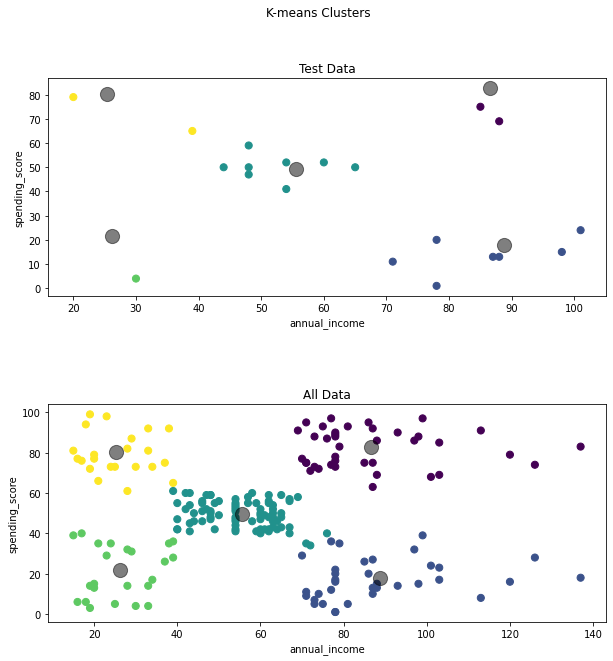

In [18]:
############# Your code here ############ 
fig, axs = plt.subplots(2, figsize=(10, 10))
fig.suptitle('K-means Clusters')

kmeans = KMeans(n_clusters=5, random_state=42).fit(X_train)
y_pred = kmeans.predict(X_test)
axs[0].scatter(np.array(X_test)[:, 0], np.array(X_test)[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
axs[0].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
axs[0].set_title("Test Data")
axs[0].set_xlabel("annual_income")
axs[0].set_ylabel("spending_score")

y_pred = kmeans.predict(X)
axs[1].scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y_pred, s=50, cmap='viridis')
axs[1].scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
axs[1].set_title("All Data")
axs[1].set_xlabel("annual_income")
axs[1].set_ylabel("spending_score")

fig.subplots_adjust(hspace=0.5)
plt.show()
#########################################

## Q10. Elbow diagram (10 points)

**Which value for $k$?!** 

Search about Elbow diagram for kmeans. Write about it here briefly and plot the Elbow diagram to achieve the best paramater $k$ for our kmeans algorithm.

**Answer** 

The Elbow Method is a heuristic used to determine the optimal value of k, which is the number of clusters into which the data may be clustered. To determine the optimal number of clusters, we have to select the value of k at the "elbow," i.e. the point after which the distortion/inertia start decreasing linearly. Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, one should choose a number of clusters so that adding another cluster does not give much better modelling of the data. Note that  Distortion is the average of the squared distances from the cluster centres of the respective clusters. Typically, the Euclidean distance metric is used, and Inertia is the sum of squared distances of samples to their closest cluster centre. For instance, the best parameter for k is five here.

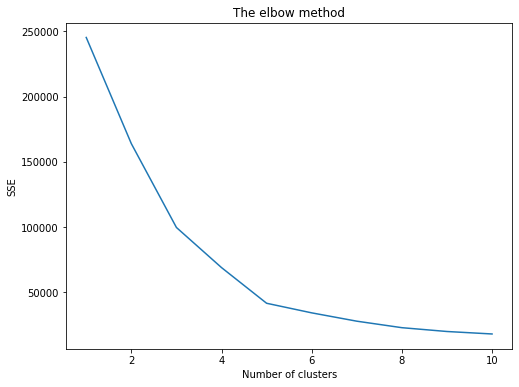

In [19]:
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)
best_k = 1
loss = []
least_loss = float('inf')
for k in range(1,11):    
    ############# Your code here ############
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(X_train)
    y_kmeans = kmeans.predict(X_test)
    loss.append(kmeans.inertia_)
    if kmeans.inertia_ < least_loss:
      best_k = k
      least_loss = kmeans.inertia_
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), loss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')    
plt.show()
    #########################################

# 3. Submission

Please read the notes here carefully:

1. The more beautiful and insightfull your plots and diagrams are, the more points you get. So please take your time and concentration to prepare a good report with nice diagrams.

2. Copy and paste all the codes you have implemented in a `Utils.py` file. Note that you won't need to add any other functions and you just have to copy and paste the functions which have ***\"Your code here\"*** comments in its body.

3. The file you upload must be named as `[Student ID]-[Your name].zip` and it must contain **only 2 files**:

  - `BasicMachineLearningAlgorithms.ipynb`
  - `Utils.py`
  
4. **Important Note**: The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that 
  
In case you have any questions, contact **mohammad99hashemi@gmail.com**